# Supervised Machine Learning
### Linear Regression, Kernel-Ridge Regression and Support Vector Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import scipy.linalg

In [3]:
from sklearn import linear_model
from sklearn import model_selection, neighbors, tree, ensemble

The sklearn supervised learning functions are organized into several modules:
 - [linear_model](http://scikit-learn.org/stable/modules/linear_model.html): regression with [generalized linear models](https://en.wikipedia.org/wiki/Generalized_linear_model).
 - [kernel_ridge](http://scikit-learn.org/stable/modules/kernel_ridge.html): ridge regression using the kernel trick.
 - [svm](http://scikit-learn.org/stable/modules/svm.html): regression, classification (and outlier detection) with [support vector machines](https://en.wikipedia.org/wiki/Support_vector_machine).
 - [tree](http://scikit-learn.org/stable/modules/tree.html): regression and classification using [decision trees](https://en.wikipedia.org/wiki/Decision_tree).
 - [discriminant_analysis](http://scikit-learn.org/stable/modules/lda_qda.html): classification using [linear](https://en.wikipedia.org/wiki/Linear_discriminant_analysis) and [quadratic](https://en.wikipedia.org/wiki/Quadratic_classifier) discriminant analysis.
 - [ensemble](http://scikit-learn.org/stable/modules/ensemble.html): regression, classification (and anomaly detection) using [ensemble methods](https://en.wikipedia.org/wiki/Ensemble_learning).
 - [gaussian_process](http://scikit-learn.org/stable/modules/gaussian_process.html): regression and classification using [Gaussian processes](https://en.wikipedia.org/wiki/Gaussian_process).
 - [naive_bayes](http://scikit-learn.org/stable/modules/naive_bayes.html): Bayesian classification with [oversimplified assumptions](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).


### Linear Regression

A standard linear regression assumes the observed data $D = (X,Y)$ is explained by the model,
$$
Y = X W + \delta Y \; ,
$$
where, in general, all quantities are matrices, the model parameters are the elements of $W$, and $\delta Y$ is the "noise" inherent in $Y$.

#### Example: fitting a line

Let us generate a random dataset for linear regression with added noise,


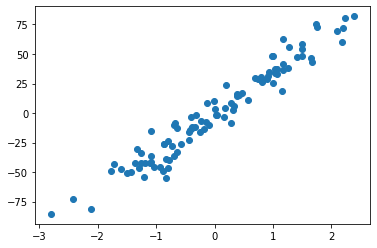

In [4]:
from sklearn.datasets import make_regression
gen = np.random.RandomState(seed=123)
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=gen)
#No. of sample and noise can be changed 
plt.scatter(X,y)
plt.show()

More options can be specified to characterize the data using [make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html).

We can create these samples in a number of ways. Let us split the data into training set and test set, 

In [5]:
# Let us take the first 80 samples to train, and the last 10 to test
X_train = X[:-20]
y_train = y[:-20]

X_test = X[-20:]
y_test = y[-20:]

The `LinearRegression` function solves the [linear least squares problem](https://en.wikipedia.org/wiki/Linear_least_squares_%28mathematics%29) by minimizing sum of squared residuals
$$
S \equiv \sum_{i=1}^N \left| Y_i - (X W)_i \right|^2
$$
with respect to the model parameters (elements of $W$), where $i$ indexes the $N$ samples in the dataset. The syntax will be familiar from the sklearn functions we used earlier:

In [6]:
fit = linear_model.LinearRegression(fit_intercept=True).fit(X_train, y_train)

`LinearRegression` will automatically calculate and subtract any non-zero mean of $y$ when `fit_intercept` is `True`.

The resulting $W$ matrix has only a single element, the slope of the line (which is assumed to pass through the origin):

In [7]:
W = fit.coef_
y0 = fit.intercept_
print('Coefficient: \n', W)
print('Intercept:\n ', y0)

Coefficient: 
 [34.40608015]
Intercept:
  0.3686128385314409


We then use the model to make predictions based on the test values of x


In [8]:
y_pred = fit.predict(X_test)

Now, we can calculate the models accuracy metrics based on what the actual value of y was

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('r_2 statistic: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 108.06
r_2 statistic: 0.95


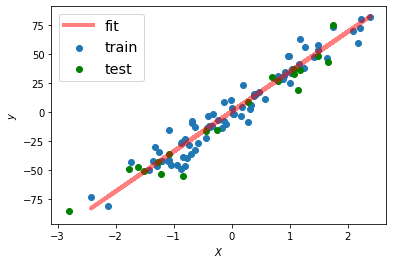

In [10]:
plt.scatter(X_train, y_train, label='train')
plt.plot(X_train, X_train.dot(W) + y0, 'r-', lw=4, alpha=0.5, label='fit')
plt.scatter(X_test, y_test, c='green', label='test', lw=1)
plt.legend(fontsize='x-large')
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.show()
#plt.xlim(-1., +1.);


#### Example: basis function linear regression

Taken from **Phys 247** taught by Prof. D. Kirkby

For our final example, we will see how "linear" regression can solve problems that appear quite nonlinear. Suppose our model is
$$
Y = a X e^{-X^2} + b \sin X^2 + \delta Y
$$
with unknown parameters $a$ and $b$:

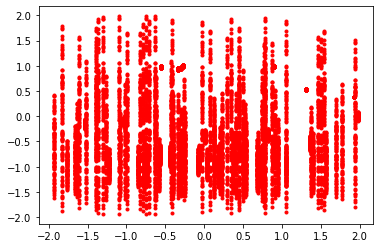

In [11]:
def generate(N=100, xlo=-2, xhi=2, a=1, b=-1, seed=123):
    gen = np.random.RandomState(seed=seed)
    X1 = gen.uniform(xlo, xhi, N)
    y1 = a * X1 * np.exp(-X ** 2) + b * np.sin(X ** 2)
    plt.plot(X1, y1, 'r.')
    return X1, y1

X1, y1 = generate()

If we replace the $N\times 1$ dataset $X$ with a $N\times 2$ dataset $Z$ of new features $(Z_1, Z_2)$:
$$
Z_1 = X e^{-X^2}  \quad, \quad Z_2 = \sin X^2 \; ,
$$
the transformed model is now linear:
$$
Y = X W
$$
with
$$
W = \begin{bmatrix}
a \\ b
\end{bmatrix} \; .
$$
The new features $Z_1$ and $Z_2$ are known as "basis functions" and this approach is called "basis function regression".  Sklearn has built-in support for [polynomial basis functions](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions) but it is easy to apply the transformations yourself for arbitrary basis functions:

In [12]:
Z = np.stack([X1 * np.exp(-X1 ** 2), np.sin(X1 ** 2)], axis=1)
Z.shape

(100, 2)

In [13]:
fit = linear_model.LinearRegression(fit_intercept=False).fit(Z, y1)
print(fit.coef_)

[[-2.27752775e-01  1.06321943e-02]
 [-1.62385929e-01 -1.12471418e+00]
 [-1.52941182e-01 -1.28875850e+00]
 [-2.04629216e-01 -3.90997227e-01]
 [-2.31416714e-01  7.42705613e-02]
 [-1.84205226e-01 -7.45738270e-01]
 [-2.73041872e-01  7.97251330e-01]
 [-2.25898574e-01 -2.15731253e-02]
 [-1.93417002e-01 -5.85740392e-01]
 [-1.79268590e-01 -8.31481929e-01]
 [-1.71472372e-01 -9.66893199e-01]
 [-2.32942955e-01  1.00779614e-01]
 [-1.86668975e-01 -7.02945813e-01]
 [-1.26309904e-01 -1.75131294e+00]
 [-1.80212738e-01 -8.15083172e-01]
 [-2.34368034e-01  1.25531570e-01]
 [-1.45874537e-01 -1.41149793e+00]
 [-1.44753047e-01 -1.43097691e+00]
 [-2.01480845e-01 -4.45680793e-01]
 [-2.01524847e-01 -4.44916535e-01]
 [-2.17865110e-01 -1.61105096e-01]
 [-2.52120204e-01  4.33866192e-01]
 [-2.32211056e-01  8.80673644e-02]
 [-2.14141008e-01 -2.25788425e-01]
 [-2.31890547e-01  8.25004982e-02]
 [-1.68251405e-01 -1.02283767e+00]
 [-1.74437106e-01 -9.15399207e-01]
 [-1.53166082e-01 -1.28485224e+00]
 [-1.63592605e-01 -1

### Multivariate Regression

**Coming soon**

### Kernel Ridge Regression

### Support Vector Machines

### Gaussian Process Regression